<a href="https://colab.research.google.com/github/Chewye/datatalks/blob/main/DataTalks_hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [145]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [146]:
from google.colab import drive
drive.mount('/content/gdrive/')
data_filepath = "/content/gdrive/MyDrive/data/housing.csv"
data = pd.read_csv(data_filepath)

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [147]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


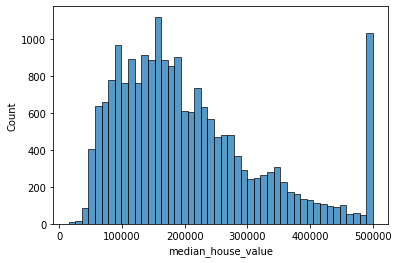

In [148]:
sns.histplot(data.median_house_value)

median_house_value not have a long tail

In [149]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [150]:
data = data.drop('ocean_proximity', axis=1)

In [151]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

Find a feature with missing values. How many missing values does it have? - 207

# **Question 2**

In [152]:
data['population'].median()

1166.0

What's the median (50% percentile) for variable 'population'? - 1166

# **Question 3**

In [153]:
n = len(data)
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [154]:
n_train = int(n * 0.6)
n_val = int(n * 0.2)

In [155]:
train = data.iloc[idx[:n_train]]
val = data.iloc[idx[n_train:n_train+n_val]]
test = data.iloc[idx[n_train+n_val:]]

In [156]:
y_train = np.log1p(train.median_house_value.values)
y_val = np.log1p(val.median_house_value.values)
y_test = np.log1p(test.median_house_value.values)

In [157]:
del train['median_house_value']
del val['median_house_value']
del test['median_house_value']

In [158]:
def linearRegression(x, y):
  x = np.column_stack([np.ones(x.shape[0]), x])
  XTX = x.T.dot(x)
  XTX_inv = np.linalg.inv(XTX)
  w = XTX_inv.dot(x.T).dot(y)
  return w[0], w[1:]

In [159]:
def prepare(data = data, train = train, columns='total_bedrooms', option=0):
  if option == 0:
    return data.fillna(0).values
  elif option == "mean":
    return data.fillna(train[columns].mean()).values
  else:
    return "error"

In [160]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return round(np.sqrt(mse), 2)

In [161]:
x_train_0 = prepare(data = train)
w0_0, w_0 = linearRegression(x_train_0, y_train) #missing values 0 

In [162]:
x_train_mean = prepare(data=train, option= 'mean') 
w0_mean, w_mean = linearRegression(x_train_mean, y_train) #missing values mean

In [163]:
print(w0_0, w_0, '\n', w0_mean, w_mean)

-11.686975242036546 [-2.76255120e-01 -2.82087184e-01  2.91329621e-03 -8.64531514e-06
  1.50811922e-04 -2.08205659e-04  5.69546573e-04  1.71308139e-01] 
 -11.759590872680436 [-2.76809637e-01 -2.82182103e-01  2.93033801e-03 -1.48543785e-05
  2.48054046e-04 -2.03763456e-04  4.87004092e-04  1.73086593e-01]


In [164]:
y_predict_0 = w0_0 + x_train_0.dot(w_0)
y_predict_0

array([11.28055213, 11.90427911, 12.46507934, ..., 11.53259294,
       11.92377088, 12.54517195])

In [165]:
y_predict_mean = w0_mean + x_train_mean.dot(w_mean)
y_predict_mean

array([11.37346084, 11.97238956, 12.49872828, ..., 11.53551178,
       11.92115877, 12.54500627])

In [166]:
#Validating the model 
x_val_0 = prepare(data=val)
x_val_mean = prepare(data=val, option='mean')
y_val_0 = w0_0 + x_val_0.dot(w_0)
y_val_mean = w0_mean + x_val_mean.dot(w_mean)
print(f'rmse with 0: {rmse(y_val, y_val_0)} \nrmse with mean: {rmse(y_val, y_val_mean)}')

rmse with 0: 0.33 
rmse with mean: 0.33


Both options are equally good

# **Question 4**

In [167]:
r = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

In [168]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [169]:
for i in r:
  w0, w = train_linear_regression_reg(x_train_0, y_train, r=i)
  x_val = prepare(data=val)
  y_pred = w0 + x_val.dot(w)
  rmse_val = rmse(y_val, y_pred)
  print(f'rmse with r = {i}: {rmse_val}')

rmse with r = 0: 0.33
rmse with r = 1e-06: 0.33
rmse with r = 0.0001: 0.33
rmse with r = 0.001: 0.33
rmse with r = 0.01: 0.33
rmse with r = 0.1: 0.33
rmse with r = 1: 0.33
rmse with r = 5: 0.34
rmse with r = 10: 0.34


# **Question 5**

In [170]:
def split_data(data, seed = 42):
  n = len(data)
  idx = np.arange(n)
  np.random.seed(seed)
  np.random.shuffle(idx)
  n_train = int(n * 0.6)
  n_val = int(n * 0.2)
  train = data.iloc[idx[:n_train]]
  val = data.iloc[idx[n_train:n_train+n_val]]
  test = data.iloc[idx[n_train+n_val:]]
  y_train = np.log1p(train.median_house_value.values)
  y_val = np.log1p(val.median_house_value.values)
  y_test = np.log1p(test.median_house_value.values)
  del train['median_house_value']
  del val['median_house_value']
  del test['median_house_value']
  return [[train, val, test], [y_train, y_val, y_test]]

In [171]:
seed = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_list = []
for i in seed:
  x = prepare(data = split_data(data, seed=i)[0][0])
  y = split_data(data, seed=i)[1][0]
  w0, w = linearRegression(x, y)
  x_val = prepare(data=split_data(data, seed=i)[0][1])
  y_val = split_data(data, seed=i)[1][1]
  y_pred = w0 + x_val.dot(w)
  rmse_seed = rmse(y_val, y_pred)
  rmse_list.append(rmse_seed) 
  print(f'seed = {i}, rmse = {rmse_seed}')
print(f'Standard deviation: {round(np.std(rmse_list), 3)}')

seed = 0, rmse = 0.34
seed = 1, rmse = 0.34
seed = 2, rmse = 0.33
seed = 3, rmse = 0.34
seed = 4, rmse = 0.34
seed = 5, rmse = 0.34
seed = 6, rmse = 0.35
seed = 7, rmse = 0.34
seed = 8, rmse = 0.35
seed = 9, rmse = 0.34
Standard deviation: 0.005


# **Question 6**

In [173]:
x_train = split_data(data, seed=9)[0][0]
x_val = split_data(data, seed=9)[0][1]
x_test = split_data(data, seed=9)[0][2]
y_train = split_data(data, seed=9)[1][0] 
y_val = split_data(data, seed=9)[1][1]
y_test = split_data(data, seed=9)[1][2] 

In [177]:
x = pd.concat([x_train, x_val])
x = x.reset_index(drop=True)
x = prepare(data = x)
y = np.concatenate([y_train, y_val])

In [179]:
w0, w = train_linear_regression_reg(x, y)
y_pred = w0 + x_test.dot(w)
rmse_test = rmse(y_test, y_pred)
rmse_test

0.35